In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [3]:
reviews_df = pd.read_csv('fake_reviews_dataset.csv')

# Building a Neural Network

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Preprocessing the text data
texts = reviews_df['text'].values
labels = reviews_df['label'].values

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

#Split into validation and train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val),callbacks = [early_stopping])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


760/760 ━━━━━━━━━━━━━━━━━━━━ 105s 132ms/step - accuracy: 0.5772 - loss: 0.6729 - val_accuracy: 0.7336 - val_loss: 0.5706
Epoch 2/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.6782 - loss: 0.6048 - val_accuracy: 0.8655 - val_loss: 0.3393
Epoch 3/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 98s 129ms/step - accuracy: 0.8674 - loss: 0.3359 - val_accuracy: 0.9295 - val_loss: 0.1767
Epoch 4/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.9461 - loss: 0.1484 - val_accuracy: 0.9409 - val_loss: 0.1529
Epoch 5/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 100s 131ms/step - accuracy: 0.9668 - loss: 0.0926 - val_accuracy: 0.9394 - val_loss: 0.1541
Epoch 6/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.9791 - loss: 0.0633 - val_accuracy: 0.9373 - val_loss: 0.1738
Epoch 7/20
760/760 ━━━━━━━━━━━━━━━━━━━━ 138s 125ms/step - accuracy: 0.9850 - loss: 0.0457 - val_accuracy: 0.9377 - val_loss: 0.2070


In [14]:
#make predictions on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print(classification_report(y_test, y_pred))
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4031
           1       0.96      0.91      0.94      4075

    accuracy                           0.94      8106
   macro avg       0.94      0.94      0.94      8106
weighted avg       0.94      0.94      0.94      8106

[[3883  148]
 [ 347 3728]]


In [16]:
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5).astype(int)

print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

760/760 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12125
           1       0.98      0.95      0.97     12190

    accuracy                           0.97     24315
   macro avg       0.97      0.97      0.97     24315
weighted avg       0.97      0.97      0.97     24315

[[11909   216]
 [  587 11603]]


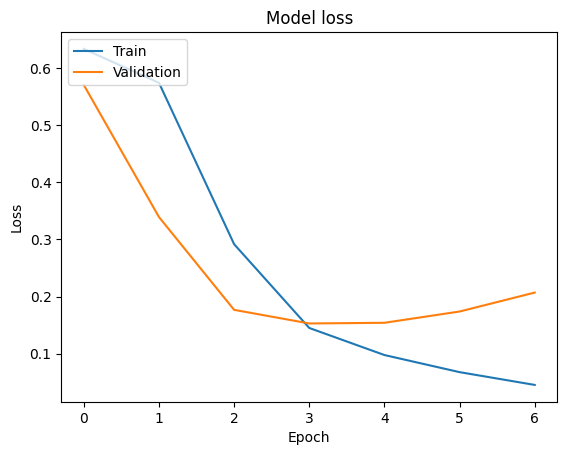

In [17]:
#Plot train vs validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')